<table style="width: 100%;">
  <tr>
    <td style="text-align: left;"><h1 style="font-size: 30px;">Encoding</h1></td>
    <td style="text-align: right;"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Logo_Universitat_de_Barcelona.png" alt="University of Barcelona Logo" width="200" /></td>
  </tr>
</table>

# Introduction to One-Hot Encoding

In the field of machine learning, data often comes in various forms, including both numerical and categorical data. While many machine learning algorithms are designed to work with numerical data, categorical data poses a challenge. One common technique used to handle categorical data is "One-Hot Encoding."

**One-Hot Encoding** is a method of converting categorical data into a binary format, making it suitable for machine learning algorithms that require numerical input. This technique transforms each category within a categorical feature into a separate binary feature or column. Each new column represents the presence or absence of a specific category, taking the value 1 (True) or 0 (False) accordingly.

## Why One-Hot Encoding?

Machine learning models, such as regression or neural networks, work with mathematical equations and require numerical input. Categorical data, such as "colors" or "city names," cannot be directly used as-is in these models. One-Hot Encoding helps in the following ways:

1. **Preserving Categorical Information:** One-Hot Encoding retains the categorical information while representing it in a format that machine learning algorithms can process.

2. **Avoiding Ordinal Confusion:** Unlike label encoding, where categories are assigned numeric values, One-Hot Encoding avoids introducing a false ordinal relationship between categories. Each category is treated independently.

3. **Enhancing Model Performance:** Many machine learning algorithms perform better when presented with one-hot encoded categorical features, as they can capture the relationships between categories more effectively.

## How One-Hot Encoding Works

The One-Hot Encoding process involves the following steps:

1. **Identification of Categorical Columns:** Identify which columns in your dataset contain categorical data that needs to be encoded.

2. **Creation of Binary Columns:** For each unique category within a categorical column, create a new binary column. Each binary column corresponds to one category.

3. **Assignment of Binary Values:** Assign a value of 1 (True) to the binary column that corresponds to the category present in the original data, and 0 (False) to all other binary columns.

4. **Repeat for Each Categorical Column:** Perform these steps for all the categorical columns you want to encode.

In this notebook, we will perform One-Hot Encoding using Python and the pandas library. This technique will enable us to convert categorical data into a numerical format suitable for machine learning tasks. In this case we are going to encode the variables "neighbourhood_cleansed", "neighbourhood_group_cleansed" and "amenities". 
After that, PCA will be performed to reduce the database.

Let's get started!

In [4]:
# basic initialization code

import pandas as pd
import numpy as np
from rich import print
import ast                     # To transform a string into an array
import re

filtered_insight = pd.read_csv('bdd_barcelona/processed/Test-1/processed_listings.csv')

### Encode Neighbourhoods

In [2]:
unique_neighbourhood_group = filtered_insight['neighbourhood_group_cleansed'].unique()
unique_neighbourhood = filtered_insight['neighbourhood_cleansed'].unique()
print(f"The amound of unique neighbourhood groups is: {len(unique_neighbourhood_group)}")
print(f"The amound of unique neighbourhood cleansed is: {len(unique_neighbourhood)}")
print("Having seen this, we will only use the groups and not cleansed")

The amound of unique neighbourhood groups is: 10

The amound of unique neighbourhood cleansed is: 63

Having seen this, we will only use the groups and not cleansed

In [3]:
# One Hot Encoding using sklearn.preprocessing

from sklearn.preprocessing import OneHotEncoder

filtered_insight_OHE = filtered_insight.copy()

neighbourhood_encoder = OneHotEncoder()
nei_groups_1hot = neighbourhood_encoder.fit_transform(filtered_insight_OHE[['neighbourhood_group_cleansed']])

# OneHotEncoder returns by default a sparse matrix instead of a Numpy array, therefore we have to use the .toarray() method to get the desired columns
nei_groups_1hot_real = nei_groups_1hot.toarray()
column_names = neighbourhood_encoder.categories_
for i in range(len(column_names)):
    filtered_insight_OHE[column_names[i]] = nei_groups_1hot_real[i]
filtered_insight_OHE.drop('neighbourhood_group_cleansed', axis = 1, inplace = True)
display(filtered_insight_OHE.head(1))


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
0,5,34981,https://www.airbnb.com/rooms/34981,20230610001920,2023-06-10,city scrape,Rental unit in Barcelona · ★4.52 · 4 bedrooms ...,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Encode amenities

#### Reduce searchable amenities

In [14]:
# get all unique amenities
all_amenities = []
for sublist in filtered_insight['amenities']:
    real_sublist = ast.literal_eval(sublist)
    for word in real_sublist:
        all_amenities.append(word)

unique_amenities_list = sorted(set(all_amenities))
#print(unique_amenities_list)
print(f"The longitude of distinct amenities is: {len(unique_amenities_list)}, therefore, we have to keep working on it to make it viable.")

# Reduce the amound of unique amenities ---------------------------------------

encode_dict = {} # the results of this part will be saved here: a dictionary of key:"new_word", values:["array","of","strings"]

# Lets compress all words that contain wifi
pattern = re.compile(r'wifi', re.IGNORECASE)
wifi_list = [word for word in unique_amenities_list if pattern.search(word)]
encode_dict["wifi"] = wifi_list
filtered_amenities_list = [amenity for amenity in unique_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("wifi")
print(f"Len after compressing wifi containing words: {len(filtered_amenities_list)}")

# Lets compress all wirds that contain TV
pattern = re.compile(r'TV', re.IGNORECASE)
tv_list = [word for word in filtered_amenities_list if pattern.search(word)]
encode_dict["TV"] = tv_list
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("TV")
print(f"Len after compressing HDTV containing words: {len(filtered_amenities_list)}")

# lets remove a varaiety of words to simplify

pattern = re.compile(r'shampoo', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("shampoo")
encode_dict["shampoo"] = variouse_list

pattern = re.compile(r'soap', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("soap")
encode_dict["soap"] = variouse_list

pattern = re.compile(r'parking', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
pattern = re.compile(r'garage', re.IGNORECASE)
variouse_list.extend([word for word in filtered_amenities_list if pattern.search(word)])
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]

filtered_amenities_list.append("parking")
encode_dict["parking"] = variouse_list

pattern = re.compile(r'exercise', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
pattern = re.compile(r'gym', re.IGNORECASE)
variouse_list.extend([word for word in filtered_amenities_list if pattern.search(word)])
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]

filtered_amenities_list.append("gym")
encode_dict["gym"] = variouse_list

pattern = re.compile(r'stove', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("stove")
encode_dict["stove"] = variouse_list

pattern = re.compile(r'oven', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("oven")
encode_dict["oven"] = variouse_list

pattern = re.compile(r'coffee', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("cofee")
encode_dict["cofee"] = variouse_list

pattern = re.compile(r'refrigerator', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("refrigerator")
encode_dict["refrigerator"] = variouse_list

pattern = re.compile(r'books', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("books")
encode_dict["books"] = variouse_list

pattern = re.compile(r'pool', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("pool")
encode_dict["pool"] = variouse_list

pattern = re.compile(r'clothing', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("clothing") 
encode_dict["clothing"] = variouse_list

pattern = re.compile(r'Washer', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("washer")
encode_dict["washer"] = variouse_list

pattern = re.compile(r'conditioner', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("conditioner")
encode_dict["conditioner"] = variouse_list

pattern = re.compile(r'dryer', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("dryer")
encode_dict["dryer"] = variouse_list

pattern = re.compile(r'backyard', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("backyard")
encode_dict["backyard"] = variouse_list

pattern = re.compile(r'Baby', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("Baby")
encode_dict["Baby"] = variouse_list

pattern = re.compile(r'console', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("console")
encode_dict["console"] = variouse_list

pattern = re.compile(r'sound', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("sound")
encode_dict["sound"] = variouse_list

pattern = re.compile(r'crib', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("crib")
encode_dict["crib"] = variouse_list

pattern = re.compile(r'grill', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("grill")
encode_dict["grill"] = variouse_list

pattern = re.compile(r'fireplace', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("fireplace")  
encode_dict["fireplace"] = variouse_list

pattern = re.compile(r'Shared hot tub', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("Shared hot tub")
encode_dict["Shared hot tub"] = variouse_list

pattern = re.compile(r'hot tub', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("hot tub")
encode_dict["hot tub"] = variouse_list

pattern = re.compile(r'beach', re.IGNORECASE)
variouse_list = [word for word in filtered_amenities_list if pattern.search(word)]
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]
filtered_amenities_list.append("beach")
encode_dict["beach"] = variouse_list

pattern = re.compile(r'chair', re.IGNORECASE)
filtered_amenities_list = [amenity for amenity in filtered_amenities_list if not pattern.search(amenity)]


print(f"Len after compressing variouse containing words: {len(filtered_amenities_list)}")

filtered_amenities_list.sort()
print(f"""The list of amenities to be one-hot encoded will be:
{filtered_amenities_list}""")
print(f"""This are the new words that encapsule the 900 words that have been compressed: 
{encode_dict.keys()}""")
print("Now that we have a short enough list, lets make the encode")

The longitude of distinct amenities is: 1044, therefore, we have to keep working on it to make it viable.

Len after compressing wifi containing words: 877

Len after compressing HDTV containing words: 614

Len after compressing variouse containing words: 137

The list of amenities to be one-hot encoded will be:
['AC - split type ductless system', 'Air conditioning', 'Baby', 'Baking sheet', 'Barbecue utensils', 'Bathtub', 
'Bay view', 'Bed linens', 'Bidet', 'Bikes', 'Blender', 'Board games', 'Bread maker', 'Breakfast', 'Building staff',
'Canal view', 'Carbon monoxide alarm', 'Ceiling fan', 'Central air conditioning', 'Central heating', 'Changing 
table', 'Children’s dinnerware', 'City skyline view', 'Cleaning available during stay', 'Cleaning products', 
'Cooking basics', 'Courtyard view', 'Dedicated workspace', 'Dining table', 'Dishes and silverware', 'EV charger', 
'Elevator', 'Essentials', 'Ethernet connection', 'Extra pillows and blankets', 'Fire extinguisher', 'Fire pit', 
'First aid kit', 'Free carport on premises – 1 space', 'Free resort access', 'Freezer', 'Garden view', 'Hammock', 
'Hangers', 'Harbor view', 'Heating', 'Heating - split type ductless system', 'Host greets you', 'Hot water', 'Hot 
water kettle', 'Iron', 'Kayak', 'Keypad', 'Kitchen', 'Lake access', 'Lake view', 'Laundromat nearby', 'Lock on 
bedroom door', 'Lockbox', 'Long term stays allowed', 'Luggage dropoff allowed', 'Marina view', 'Microwave', 'Mini 
fridge', 'Mosquito net', 'Mountain view', 'Ocean view', 'Outdoor dining area', 'Outdoor furniture', 'Outdoor 
kitchen', 'Outdoor shower', 'Outlet covers', 'Paid resort access', 'Park view', 'Patio or balcony', 'Pets allowed',
'Piano', 'Ping pong table', 'Portable air conditioning', 'Portable fans', 'Portable heater', 'Private entrance', 
'Private living room', 'Private outdoor kitchen', 'Private patio or balcony', 'Private sauna', 'Radiant heating', 
'Record player', 'Resort access', 'Resort view', 'Rice maker', 'Room-darkening shades', 'Safe', 'Sauna', 'Sea 
view', 'Security cameras on property', 'Self check-in', 'Shared patio or balcony', 'Shower gel', 'Single level 
home', 'Ski-in/Ski-out', 'Smart lock', 'Smoke alarm', 'Smoking allowed', 'Sun loungers', 'TV', 'Table corner 
guards', 'Toaster', 'Trash compactor', 'Valley view', 'Waterfront', 'Window AC unit', 'Window guards', 'Wine 
glasses', 'backyard', 'beach', 'books', 'clothing', 'cofee', 'conditioner', 'console', 'crib', 'dryer', 
'fireplace', 'grill', 'gym', 'hot tub', 'oven', 'parking', 'pool', 'refrigerator', 'shampoo', 'soap', 'sound', 
'stove', 'washer', 'wifi']

This are the new words that encapsule the 900 words that have been compressed: 
dict_keys(['wifi', 'TV', 'shampoo', 'soap', 'parking', 'gym', 'stove', 'oven', 'cofee', 'refrigerator', 'books', 
'pool', 'clothing', 'washer', 'conditioner', 'dryer', 'backyard', 'Baby', 'console', 'sound', 'crib', 'grill', 
'fireplace', 'Shared hot tub', 'hot tub', 'beach'])

Now that we have a short enough list, lets make the encode

#### Apply 1Hot encoder

In [15]:
import ast
import warnings
warnings.filterwarnings('ignore') #ignore all warnings, very messy

# Lets create the "One-hot Encoding" onto filtered_insigh_OHE for the amenities
filtered_insight_OHE_2 = filtered_insight_OHE.copy()

try:
    filtered_insight_OHE_2['amenities'] = filtered_insight_OHE_2['amenities'].apply(ast.literal_eval) # Make the string 'amenities' an array of strings
except (SyntaxError, ValueError) as e:
    # Handle the exception here
    print(f"Amenities already transformed to an array")
    
# In future versions this will be done with a custome transformer
def check_amenities_in_filter(amenities, filter):
    return any(amenity in filter for amenity in amenities)

for value in filtered_amenities_list:
    appear = False
    # get all unique amenities
    if value in encode_dict.keys(): # If amenit is a compressed value, look into
        word_filter = encode_dict[value]
    else:
        word_filter = [value]
    filtered_insight_OHE_2[value] = filtered_insight_OHE_2.apply(lambda row: 1.0 if check_amenities_in_filter(row['amenities'], word_filter) else 0.0, axis=1)  

display(filtered_insight_OHE_2.head(1))

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,oven,parking,pool,refrigerator,shampoo,soap,sound,stove,washer,wifi
0,5,34981,https://www.airbnb.com/rooms/34981,20230610001920,2023-06-10,city scrape,Rental unit in Barcelona · ★4.52 · 4 bedrooms ...,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [16]:
text = f"""
We have succesfully applied one-hot encodding to neighbourhood and amenities. 
The task in hand now is to perform a PCA in order to downsize dimension since now we have {len(filtered_insight_OHE_2.keys())} columns
And since {len(filtered_amenities_list)} of them have been created for the amenities, much will presumably be stripped off"""
print(text)

We have succesfully applied one-hot encodding to neighbourhood and amenities. 
The task in hand now is to perform a PCA in order to downsize dimension since now we have 222 columns
And since 137 of them have been created for the amenities, much will presumably be stripped off

# Introduction to Principal Component Analysis (PCA)

Principal Component Analysis, commonly known as **PCA**, is a powerful dimensionality reduction technique used in various fields, including machine learning, statistics, and data analysis. PCA is especially valuable when dealing with high-dimensional data, as it helps simplify complex datasets while preserving the most critical information.

## What is PCA?

PCA is a mathematical procedure that transforms a set of correlated features, possibly high-dimensional, into a new set of uncorrelated variables called "principal components." These principal components are linear combinations of the original features and are ordered by their ability to explain the variance in the data.

The primary goals of PCA are as follows:

1. **Dimensionality Reduction:** PCA reduces the number of features while retaining as much information as possible. It accomplishes this by projecting the data onto a lower-dimensional subspace.

2. **Decorrelation:** PCA ensures that the principal components are uncorrelated, eliminating multicollinearity among features.

3. **Variance Maximization:** PCA orders the principal components so that the first few components capture the most variance in the data, allowing for a compact representation of the dataset.

## When to Use PCA?

You may consider using PCA in the following scenarios:

1. **High-Dimensional Data:** When working with datasets containing a large number of features, PCA can help reduce dimensionality while preserving key information.

2. **Visualization:** PCA is often used for visualizing high-dimensional data by projecting it into a lower-dimensional space (e.g., 2D or 3D) for easy visualization.

3. **Noise Reduction:** PCA can be used to remove noise and focus on the most significant patterns or structures in the data.

4. **Feature Engineering:** In some cases, PCA can be used as a feature engineering technique to create new features that capture the most important aspects of the original data.

## How PCA Works?

PCA involves a series of mathematical steps, including:

1. **Centering the Data:** Subtracting the mean from each feature to ensure that the data is centered around the origin.

2. **Calculating the Covariance Matrix:** Computing the covariance matrix of the centered data to understand how features are correlated.

3. **Eigenvalue Decomposition:** Finding the eigenvalues and eigenvectors of the covariance matrix. These eigenvectors represent the principal components, and the eigenvalues indicate the variance explained by each component.

4. **Selecting Principal Components:** Choosing a subset of the principal components based on their contribution to the total variance. Typically, the first few components that capture most of the variance are selected.

5. **Projecting Data:** Transforming the original data into the new feature space defined by the selected principal components.

## Manifold Learning vs. PCA

While PCA is a widely used dimensionality reduction technique, it has limitations, particularly when dealing with complex, non-linear datasets. Here's how Manifold Learning differs from PCA:

1. **Non-Linearity:** Manifold Learning techniques can capture non-linear relationships in the data, making them suitable for datasets with intricate structures. In contrast, PCA is a linear technique and may not perform well when data relationships are non-linear.

2. **Local vs. Global Structure:** Manifold Learning is especially useful for preserving local structures or clusters of data points. It aims to capture the intrinsic geometry of the data manifold. In contrast, PCA primarily focuses on preserving global data structure and variance.

3. **Data Visualization:** Manifold Learning techniques are often preferred when the goal is to visualize complex, high-dimensional data in a lower-dimensional space while maintaining its non-linear structure.

In summary, PCA is a powerful technique for linear dimensionality reduction, focusing on orthogonal axes and preserving global structure and variance. Manifold Learning techniques, on the other hand, are designed for capturing non-linear relationships, local structures, and are often used for data visualization in lower-dimensional spaces. The choice between PCA and Manifold Learning depends on the nature of the data and the specific goals of dimensionality reduction.

In this notebook, we will explore how to use PCA for dimensionality reduction and data visualization, understand its applications, and demonstrate its implementation using Python and popular libraries like NumPy and scikit-learn.

Let's dive into the world of PCA!

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [18]:
def plot_pca_cumsum(cumsum_array,variance):
    d = np.argmax(cumsum_array >= variance) + 1
    # Create the main figure and two subplots with the same aspect ratio
    fig = plt.figure(figsize=(10, 3))
    ax1 = fig.add_subplot(121, aspect='auto')  # First subplot for the line plot
    ax2 = fig.add_subplot(122, aspect='auto')  # Second subplot for the text

    # Plot the cumulative variance explained on the first subplot
    ax1.plot(cumsum_array)
    ax1.axhline(y=variance, color='red', linestyle='--', label='accumulated variance = 0.95')
    ax1.set_xlabel('Number of Principal Components')
    ax1.set_ylabel('Cumulative Variance Explained')
    ax1.set_title('Cumulative Variance Explained by Principal Components')
    ax1.set_title('Variancia Acumulada Explicada per Components Principals')
    ax1.grid(False)
    ax1.legend()

    # Add text to the second subplot
    right_text = f"""
    This graph is an accumulative sum of the variance from each column added.
    As we can see, this reduces the number of columns from {len(cumsum_array)} to {d}.
    Lets now procede to perform the projection so that we get the {variance} of the variance using sklearn.decomposition.PCA.
    """
    ax2.text(0.1, 0.5, right_text, transform=ax2.transAxes, color='black', fontsize=12, verticalalignment='center')

    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # Remove ticks and labels from the second subplot
    ax2.set_xticks([])
    ax2.set_yticks([])

    # Show the plot
    plt.show()

In [19]:
def calculate_cumsum(df,variance):
    # PCA code to get the cumulative sum of variance to show a nice surbe of variance
    pca = PCA()
    pca.fit(df)
    cumsum = np.cumsum(pca.explained_variance_ratio_)  # array of the cumulative sum of variance
    
    # plot pca cumsum visualisation
    plot_pca_cumsum(cumsum,variance)
    return cumsum

Cumulative Variance for variables created by One-Hote Encoding the component 'amenities'

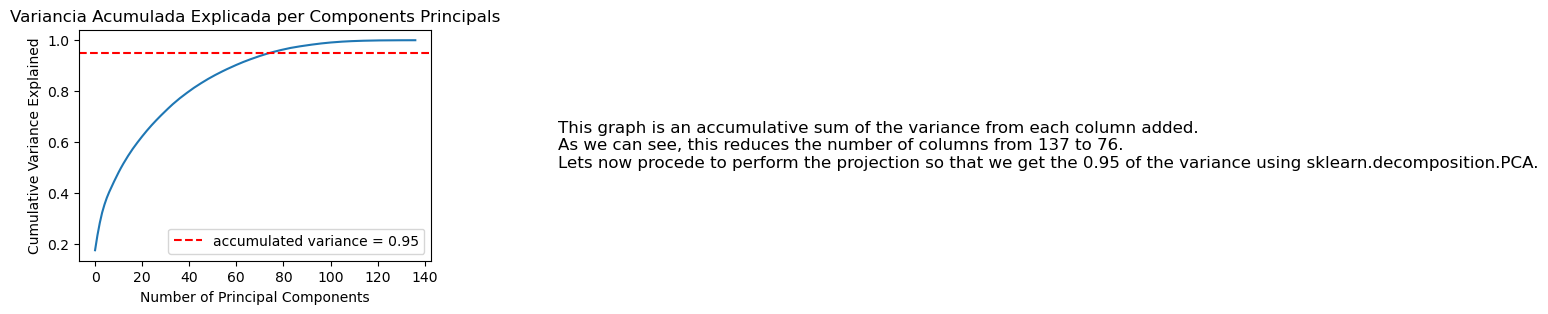

In [20]:
amenities_pca = filtered_insight_OHE_2[filtered_amenities_list].copy()
print("Cumulative Variance for variables created by One-Hote Encoding the component 'amenities'")
cumsum = calculate_cumsum(amenities_pca,0.95)

In [21]:
#Apply PCA preserving the variance
from sklearn.decomposition import PCA

variance = 0.95 # Standard

amenities_pca = filtered_insight_OHE_2[filtered_amenities_list].copy()

#This code creates and trains a PCA model that will keep 0.95 of the variance
pca = PCA(n_components = variance)
d = np.argmax(cumsum >= variance) + 1
compressed = pca.fit_transform(amenities_pca) #This contains a table full of arrays with the projected data

# In order to tranform the amenities of a new listing to get the prediction: pca.transform(new_amenities)
# Now, lets save the pca model to be able to recuperate it when neaded

#print(type(compressed))
compressed = compressed.T
print(len(compressed))

76

In [22]:
print(f"New components leangth from performing projection (PCA) is {d}, and they contain the {variance} of the total variance. Which means that this process has reduced the components by {d/len(filtered_amenities_list) : .2f}")
print(f"""This is the variance from the top {d} components: 

{pca.explained_variance_ratio_[:d]}""")

New components leangth from performing projection (PCA) is 76, and they contain the 0.95 of the total variance. 
Which means that this process has reduced the components by  0.55

This is the variance from the top 76 components: 

[0.17390987 0.05822175 0.04893038 0.04072135 0.03180471 0.02683052
 0.02243359 0.0205312  0.0194849  0.01912955 0.01838738 0.01741263
 0.01644131 0.01548781 0.01504516 0.01418718 0.01370892 0.01280595
 0.01236706 0.01201827 0.01179846 0.0115134  0.01109183 0.01077678
 0.01041935 0.01014111 0.00965276 0.00961346 0.00930676 0.00915772
 0.00905995 0.00878954 0.00877336 0.00842015 0.0079862  0.00792186
 0.00752184 0.00718052 0.00713902 0.00680994 0.00678813 0.00665008
 0.00651496 0.00611569 0.00597395 0.005871   0.00575167 0.00570038
 0.00538163 0.00522649 0.00514376 0.00499879 0.00483184 0.00471288
 0.00464266 0.00460797 0.00436155 0.00425152 0.00424407 0.0041448
 0.00409806 0.00395768 0.00389675 0.00378781 0.00363144 0.00353435
 0.00338978 0.00334445 0.00326585 0.00324109 0.00310645 0.00301202
 0.00297173 0.00278462 0.00272142 0.00256779]

In [23]:
print(f"Num of components before 1Hot encoding 'Amenities': {len(filtered_insight_OHE.columns)}")
filtered_insight_OHE_2_PCA = filtered_insight_OHE_2.copy()
print(f"Num of components after 1Hot encoding 'Amenities': {len(filtered_insight_OHE_2_PCA.columns)}")

columns_to_drop = [col for col in filtered_amenities_list if col in filtered_insight_OHE_2_PCA.columns] # per seguretat
filtered_insight_OHE_2_PCA.drop(columns=columns_to_drop, inplace=True)

# Lets add the columns created with amenities_PCA
column_titles = [f'amenities_{i}' for i in range(len(compressed))]
for i in range(len(compressed)):
    filtered_insight_OHE_2_PCA[column_titles[i]] = compressed[i]

print(f"Num of components after 1Hot encoding 'Amenities' and projection PCA: {len(filtered_insight_OHE_2_PCA.columns)}")
display(filtered_insight_OHE_2_PCA.head(1))

Num of components before 1Hot encoding 'Amenities': 85

Num of components after 1Hot encoding 'Amenities': 222

Num of components after 1Hot encoding 'Amenities' and projection PCA: 161

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,amenities_66,amenities_67,amenities_68,amenities_69,amenities_70,amenities_71,amenities_72,amenities_73,amenities_74,amenities_75
0,5,34981,https://www.airbnb.com/rooms/34981,20230610001920,2023-06-10,city scrape,Rental unit in Barcelona · ★4.52 · 4 bedrooms ...,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,...,0.026593,-0.056973,-0.387169,-0.175108,0.478251,-0.061595,-0.173578,0.097224,-0.070836,-0.048632


# Text embeding

In [24]:
from transformers import BertTokenizer, BertModel
import torch

In [25]:
# Load the pre-trained BERT model and tokenizer (you need to install transformers)
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

text_column = filtered_insight['description']

# Initialize an empty list to store the embeddings
embeddings = []

# Loop through each element in the column and embed it
for text in text_column:
    # Tokenize and convert the sentence to input format
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    # Get the sentence embedding
    with torch.no_grad():
        outputs = model(**tokens)
        sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    # Append the embedding to the list
    embeddings.append(sentence_embedding)

# Convert the list of embeddings to a NumPy array
embeddings_array = np.array(embeddings)

Now the model has been trained, now, lets process the text embeding

Cumulative Variance from the columns generated by the BERT embeding:

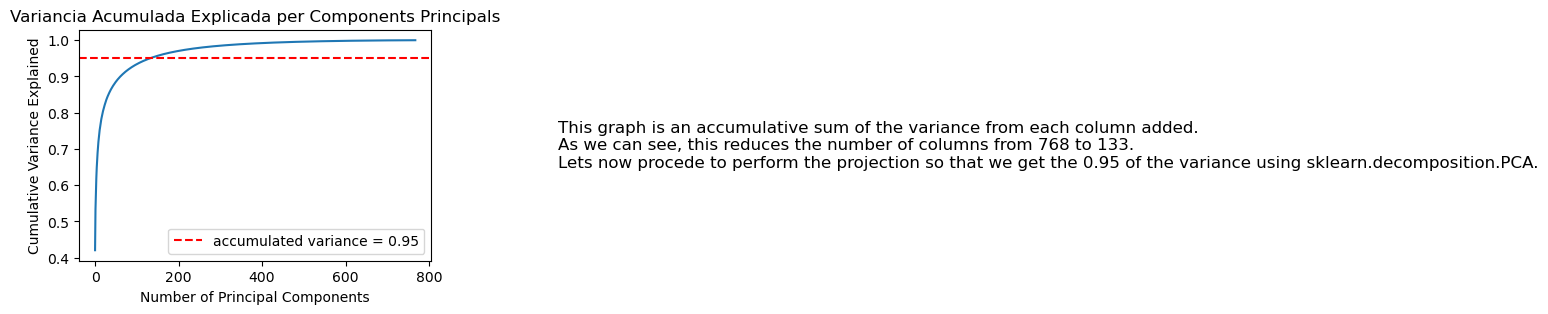

In [26]:
emb = embeddings_array.copy()
print("Cumulative Variance from the columns generated by the BERT embeding:")
cumsum = calculate_cumsum(emb,0.95)

In [27]:
# train and fit the PCA for description embeded
embeddings_array_t = embeddings_array

variance = 0.95 

emb = embeddings_array_t.copy()

pca_description = PCA(n_components = variance)
compressed = pca_description.fit_transform(emb)

compressed = compressed.T

print(f"Amound of components from using BERT embedding: {len(embeddings_array_t.T)}")
print(f"Amound of components from using BERT embedding and using a PCA: {len(compressed)}")

Amound of components from using BERT embedding: 768

Amound of components from using BERT embedding and using a PCA: 133

In [91]:
description_EMB_PCA = pd.DataFrame()
description_EMB = pd.DataFrame()

column_titles = [f'description_{i}' for i in range(len(compressed))]
for i in range(len(compressed)):
    description_EMB_PCA[column_titles[i]] = compressed[i]
    
column_titles = [f'description_{i}' for i in range(len(embeddings_array_t.T))]
for i in range(len(embeddings_array_t.T)):
    description_EMB[column_titles[i]] = embeddings_array_t.T[i]
    
display(final_bdd_PCA.shape)
display(final_bdd.shape)

description_EMB_PCA.to_csv('bdd_barcelona/processed/Test-2/description_EMB_PCA.csv', index=False)
description_EMB.to_csv('bdd_barcelona/processed/Test-2/description_EMB.csv', index=False)

(2320, 133)

(2320, 768)

In [22]:
# En cas de que no es pugui utilitzar el PCA s'ha de modificar i carregar les columnes directes del BERT
filtered_insight_OHE_2_PCA_desc = filtered_insight_OHE_2_PCA.copy()
column_titles = [f'description_{i}' for i in range(len(compressed))]
for i in range(len(compressed)):
    filtered_insight_OHE_2_PCA_desc[column_titles[i]] = compressed[i]
    
columns_to_drop = [col for col in ["description"] if col in filtered_insight_OHE_2_PCA_desc.columns] # per seguretat
filtered_insight_OHE_2_PCA_desc.drop(columns=columns_to_drop, inplace=True)

display(filtered_insight_OHE_2_PCA_desc.head(1))

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,...,description_123,description_124,description_125,description_126,description_127,description_128,description_129,description_130,description_131,description_132
0,5,34981,https://www.airbnb.com/rooms/34981,20230610001920,2023-06-10,city scrape,Rental unit in Barcelona · ★4.52 · 4 bedrooms ...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,...,0.020954,0.091444,-0.030928,-0.073121,-0.043275,-0.011149,0.008058,0.021357,0.067758,-0.044261


In [23]:
# To save the DataFrame to a CSV file with the embeddings, you can use:
filtered_insight_OHE_2_PCA_desc.to_csv('bdd_barcelona/processed/Test-2/output_with_embeddings.csv', index=False)

# Results

In [379]:
from rich import print
from tabulate import tabulate
from IPython.display import Markdown
from IPython.display import display, HTML

In [380]:
def print_title(text):
    formatted_text = f"<b><big>{text}</big></b>"
    display(HTML(formatted_text))
    return

In [381]:
def col_table3(list_strings):
    num_columns = 5
    num_rows = len(list_strings) // num_columns + (len(list_strings) % num_columns > 0)
    table = []
    if(type(list_strings) is not list):
        list_strings = list_strings.tolist()
    for i in range(num_rows):
        row = list_strings[i::num_rows]
        row.extend([''] * (num_columns - len(row)))
        table.append(row)
    html_table = tabulate(table, headers=['', '', ''], tablefmt='html')
    display(HTML(html_table))
    return

In [383]:
filtered_insight_OHE_2_PCA_embeded = filtered_insight_OHE_2_PCA_desc.copy()
print("These are the values we are working with, of wich, we will only use a few")
print_title("Insights dataset keys")
col_table3(filtered_insight_OHE_2_PCA_embeded.keys().values[1::])


These are the values we are working with, of wich, we will only use a few

,,,,
id,review_scores_rating,amenities_33,description_16,description_75
listing_url,review_scores_accuracy,amenities_34,description_17,description_76
scrape_id,review_scores_cleanliness,amenities_35,description_18,description_77
last_scraped,review_scores_checkin,amenities_36,description_19,description_78
source,review_scores_communication,amenities_37,description_20,description_79
name,review_scores_location,amenities_38,description_21,description_80
neighborhood_overview,review_scores_value,amenities_39,description_22,description_81
picture_url,license,amenities_40,description_23,description_82
host_id,instant_bookable,amenities_41,description_24,description_83
host_url,calculated_host_listings_count,amenities_42,description_25,description_84


In [387]:
# Eliminate original columns for "description", "amenities" and "neighbourhood_group_cleansed"
columns_to_drop = [col for col in ["amenities","description","neighbourhood_group_cleansed","embeddings","description_embeddings"] if col in filtered_insight_OHE_2_PCA_embeded.columns]
filtered_insight_OHE_2_PCA_embeded.drop(columns=columns_to_drop, inplace=True)

filtered_insight_OHE_2_PCA_embeded.to_csv("bdd_barcelona/processed/Test-2/insight_encoded.csv")